# Einführung in GPT-2
adaptiert von: Eugenio Tufino et al. (2024)

<!DOCTYPE html>

<body>
    <p>In diesem Notebook präsentieren wir GPT-2, ein einfacheres Modell im Vergleich zu den fortschrittlichen generativen Modellen wie GPT-4o. GPT-2 basiert auf der Architektur des <strong>Generative Pre-trained Transformers</strong> und wurde 2019 von OpenAI veröffentlicht. Es verwendet einen relativ einfachen Mechanismus zur Texterzeugung, indem es das nächste Wort in einer Sequenz basierend auf dem gegebenen Kontext vorhersagt.</p>
    
<p>Im Gegensatz zu Word2Vec, wo, wie wir gesehen haben, Wortvektoren statisch sind (der gleiche Vektor stellt ein Wort unabhängig von seiner Verwendung dar), passt GPT-2 die Wortrepräsentation dynamisch an den Kontext an. Dies ermöglicht es GPT-2, die Bedeutung von Wörtern in unterschiedlichen Situationen besser zu erfassen, was zu kohärenterer und kontextuell genauerer Texterzeugung führt.</p>
    
<p>Wir werden dieses Modell erkunden, um auf einfache Weise zu verstehen, wie diese Art von generativer KI funktioniert, wobei der Fokus auf dem Wortgenerierungsprozess und dem Einfluss von Eingabeaufforderungen auf die Ausgabe liegt.</p>

<p>Das Akronym GPT steht für Generative Pre-trained Transformer und hebt seine Hauptmerkmale hervor:</p>
    <ul>
        <li><strong>Generativ:</strong> Das Modell erzeugt kohärenten und sinnvollen Text.</li>
        <li><strong>Pretraint:</strong> Es wird auf großen Datensätzen trainiert, bevor es für spezifische Aufgaben feinabgestimmt wird.</li>
        <li><strong>Transformer:</strong> Es nutzt die Transformer-Architektur für effiziente und kontextbewusste Texterzeugung.</li>
    </ul>
</body>
</html>

# 1. Importieren der Bibliotheken für die Verwendung von GPT-2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

In [3]:
# Lade das vortrainierte GPT-2 Modell und den Tokenizer
model_name = "gpt2"  # Dies ist die kleinste Größe. Du kannst auch 'gpt2-medium' oder 'gpt2-large' verwenden.

# Der Tokenizer verarbeitet den Eingabetext in Token und konvertiert Token zurück in Text
tokenizer = GPT2Tokenizer.from_pretrained(model_name)  # Lade den vortrainierten Tokenizer für GPT-2
# Der Tokenizer verarbeitet den Eingabetext in Token und konvertiert Token zurück in Text
# Lade das vortrainierte GPT-2 Sprachmodell
# Das Modell erzeugt Text, indem es das nächste Token in einer Sequenz vorhersagt
model = GPT2LMHeadModel.from_pretrained(model_name)

print("GPT-2 Modell und Tokenizer erfolgreich geladen!")

GPT-2 Modell und Tokenizer erfolgreich geladen!


In [5]:
# Überprüfe die Größe des Vokabulars und die Vektorgröße aus der Modellkonfiguration
vocab_size = model.config.vocab_size  # Größe des Vokabulars
vector_size = model.config.n_embd  # Vektorgröße (Anzahl der Dimensionen)

print("Größe des Vokabulars:", vocab_size)
print("Vektorgröße (Anzahl der Dimensionen):", vector_size)

Größe des Vokabulars: 50257
Vektorgröße (Anzahl der Dimensionen): 768


In [96]:
prompt="Einstein was"

# Tokenisiere die Eingabeaufforderung
input_ids = tokenizer.encode(prompt, return_tensors='pt')  # Konvertiere die Eingabeaufforderung in Token

In [98]:
# Erstelle eine Aufmerksamkeitsmaske
attention_mask = torch.ones_like(input_ids)

output = model.generate(
    input_ids,
    attention_mask=attention_mask,  
    max_length=100,  # Maximale Länge der generierten Sequenz
    num_return_sequences=1,  # Anzahl der verschiedenen Sequenzen, die generiert werden sollen
    no_repeat_ngram_size=2,  # Vermeidet wiederholte Bigrams, siehe Anhang A
    temperature=0.1,  # Bestimmt die Kreativität der Textgenerierung (niedrigere Werte = deterministischere Ausgaben)
    top_k=50,  # Begrenze die Auswahl auf die Top 50 Tokens nach Wahrscheinlichkeit, um unwahrscheinliche Optionen zu reduzieren
    top_p=0.95,  # Ermöglicht Nucleus-Sampling, wobei Tokens mit kumulativer Wahrscheinlichkeit ≤ 0.95 ausgewählt werden
    do_sample=True,  # Sampling aktivieren
    pad_token_id=tokenizer.eos_token_id,  # Setze das Padding-Token
)

In [99]:
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("Generated Text:")
print(generated_text)

Generated Text:
Einstein was a member of the National Security Council, and he was the first to call for the U.S. to withdraw from the Paris climate agreement.

"I think it's important to remember that the United States is not the only country that has been involved in this," he said. "We have been a partner in the fight against climate change. We have also been partners in other countries that have done the same thing."
.@realDonaldTrump: "I'm not going to


In [121]:
import torch.nn.functional as F

# Definiere ein Prompt
prompt = "Energiererhaltung ist"

input_ids = tokenizer.encode(prompt, return_tensors='pt')

# Weiterleitung durch das Modell, um Logits zu erhalten
outputs = model(input_ids)
logits = outputs.logits  

# Hol die Logits für das letzte Token in der Eingabe
last_token_logits = logits[0, -1, :]  # Form: (vocab_size,)

# Setze die Temperatur
temperature = 0.1  # Niedriger = weniger zufällig, höher = zufälliger/kreativer

# Passen die Logits mit der Temperatur an
adjusted_logits = last_token_logits / temperature
probs = F.softmax(adjusted_logits, dim=-1)

# Wir setzen top_k=30, um die 30 wahrscheinlichsten Optionen für das nächste Token zu zeigen
top_k = 30
top_k_probs, top_k_indices = torch.topk(probs, top_k)

print("Die {} wahrscheinlichsten Optionen für das nächste Token sind:\n".format(top_k))
# Dekodiere und drucke die Top-Wörter mit ihren Wahrscheinlichkeiten
for i in range(top_k):
    word = tokenizer.decode(top_k_indices[i].item())
    prob = top_k_probs[i].item()
    print(f"{word}: {prob:.4f}")

Die 30 wahrscheinlichsten Optionen für das nächste Token sind:

 e: 0.6376
 die: 0.3360
,: 0.0215
.: 0.0049
 der: 0.0000
 n: 0.0000
 d: 0.0000
 w: 0.0000
 a: 0.0000
 g: 0.0000
 den: 0.0000
 z: 0.0000
 s: 0.0000
 �: 0.0000
 se: 0.0000
 k: 0.0000
 i: 0.0000
 in: 0.0000
 er: 0.0000
 und: 0.0000
 dem: 0.0000
 es: 0.0000
 W: 0.0000
 f: 0.0000
 im: 0.0000
 an: 0.0000
:: 0.0000
!: 0.0000
 (: 0.0000
 dies: 0.0000


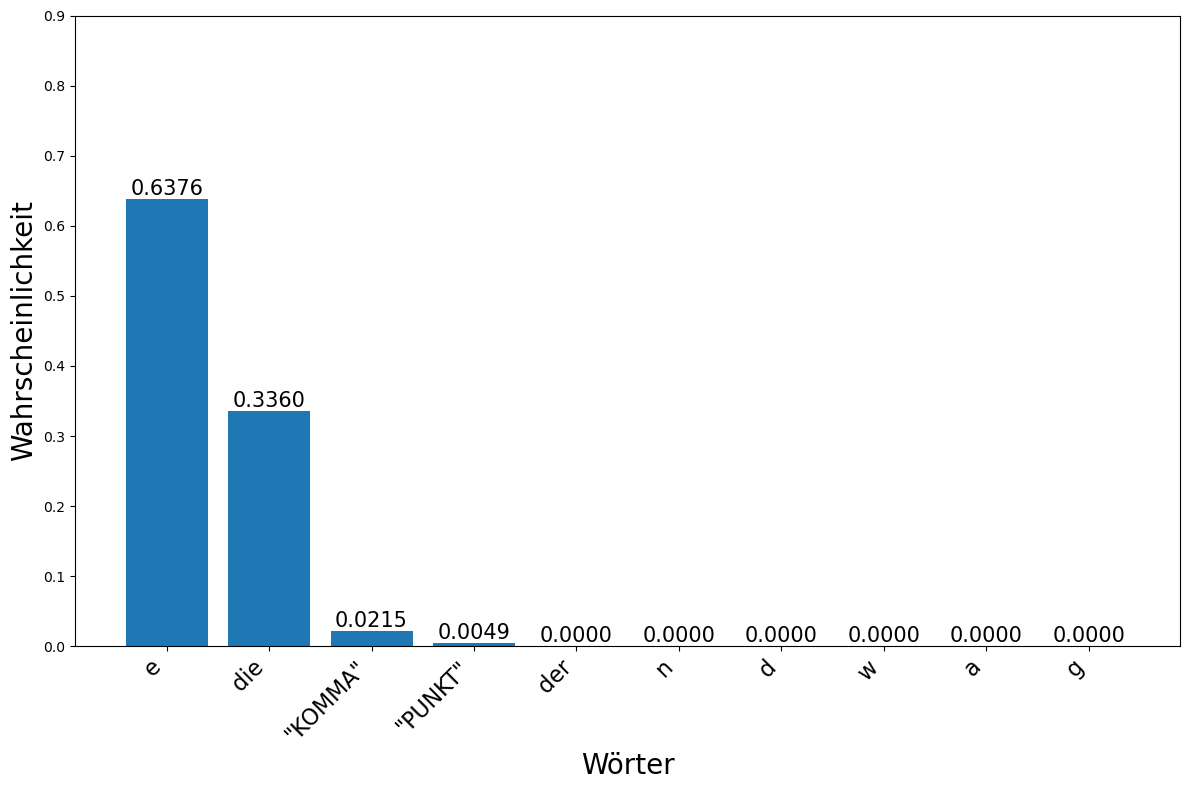

In [123]:
# Dekodiere die Wörter und beschränke sie auf die Top 10
words = [tokenizer.decode(idx.item()) for idx in top_k_indices[:10]]
probs = top_k_probs[:10].tolist()

# Mache die Interpunktion lesbarer
words = ['"KOMMA"' if w == ',' else '"PUNKT"' if w == '.' else w for w in words]

# Erstelle das Histogramm
plt.figure(figsize=(12, 8))  # Erhöhte Bildgröße
plt.bar(range(len(words)), probs, align='center')
plt.xticks(range(len(words)), words, rotation=45, ha='right', fontsize=16)  # Erhöhte Schriftgröße
plt.xlabel('Wörter', fontsize=20)
plt.ylabel('Wahrscheinlichkeit', fontsize=20)
plt.ylim(0.0, 0.9)
#plt.title('Wahrscheinlichkeiten der 10 wahrscheinlichsten nächsten Wörter', fontsize=16)

# Füge Werte oberhalb jeder Säule hinzu
for i, v in enumerate(probs):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=15)

plt.savefig('Hist_T0.8.png', dpi=400)
plt.tight_layout()
plt.show()

In [5]:
!pip freeze > requirements.txt